<a href="https://colab.research.google.com/github/TUIlmenauAMS/GVT_Lecture_Colab/blob/main/GVT_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture Fundamentals of Video Technology**

## Gerald Schuller

## Gerald.schuller@tu-ilmenau.de

###**Lecture Video:**

https://youtu.be/7oIR8Jdwmbo


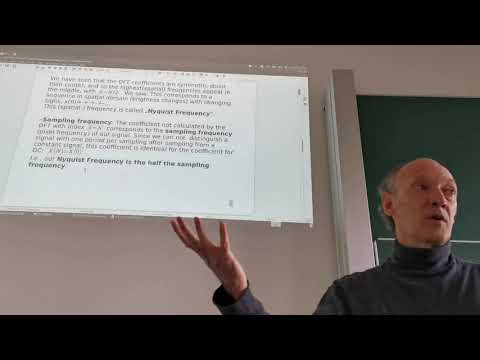

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('7oIR8Jdwmbo')

#**Reconstruction, Sampling Theorem, Quality measurment**


We have seen: To reduce the number of pixels for transmission, we need the following processing sequence:

- **Encoder**: (Lowpass) Filtering- downsampling 

- **Decoder**: Inserting the pixels in correct positions- (Lowpass) Filtering

The question is: How do we have to **design** our lowpass **filter**? What frequencies are to be passed, which ones are to be blocked or attenuated?

For the time being we consider the **Discrete Fourier Transform** (DFT). 

It generates the DFT coefficeints $X(k)$ from our signal $x(n)$ (e.g. a row of Luminance Y at pixel-position n) where $k$ is the index for the (spatial) Frequency. The Indices are also called 
 „**subband Indices**“ , and the coefficients $X(k)$ „**subband signals**“ (for k fixed).

####What is the **meaning** of the different frequency **indices** k?

- **DC**: k = 0 corresponds to the lowest spatial frequency, a constant x (n). This frequency is also called **DC**, also referred to as „direct current“.

- **Nyquist Frequency**: Let us assume that the signal $x(n)$ consists of N sample or pixels (with $0 ≤ k ≤ N$).The Indices of (spatial) frequencies then run in the same range, .

   We have seen that the DFT coefficients are symmetric about their center, and so the highest(spatial) freuqencies appear in the middle, with . We saw: This corresponds to a sequence in spatial domain (brigtness changes) with changing signs, $x(n)= +-+-+-...$

  This (spatial-) frequency is called „**Nyquist Frequency**“.

- **Sampling frequency**: The coefficient not calculated by the DFT with index  corresponds to the sampling frequency (pixel frequency) of our signal. Since we can not  distinguish a signal with one period per sampling after sampling from a constant signal, this coefficient is identical for the coefficient for DC: .
I.e., our Nyquist Frequency is the half the sampling frequency.


**iPython example for selecting the filter:**

Lets take our vector $x(n)$ containing 32 pixels, so N=32, and we want  to downsample with the factor of M=4.

We saw that by downsampling in the decoder, **periodic continuations of spectrum** (aliasing,  moire) became visible, which we must  suppress by the filter. 
Let‘s try this with a constant DC signal. Our DC signal example is a sequence of 32 ones, which we subsequently downsample with the factor M=4 :

Text(0, 0.5, 'x(n), xds(n)')

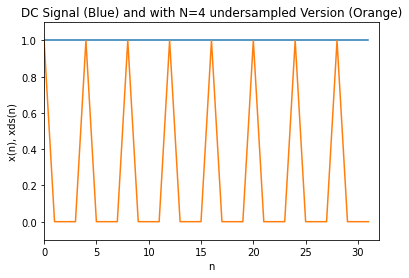

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#DC Signal:
x=np.ones(32)
#Initialize downsampled signal:
xds=np.zeros(32)
#downsample with M=4:
xds[0:32:4]=x[0:32:4]
plt.plot(x)
plt.axis([0, 32, -0.1, 1.1]) 
plt.plot(xds)
plt.title('DC Signal (Blue) and with N=4 undersampled Version (Orange)')
plt.xlabel('n') 
plt.ylabel('x(n), xds(n)') 

(Attention: The lines are generated from the plot function, in fact we have only the individual samples)

The **result of DFT of the original signal** is:

Text(0, 0.5, 'abs(FFT(x))')

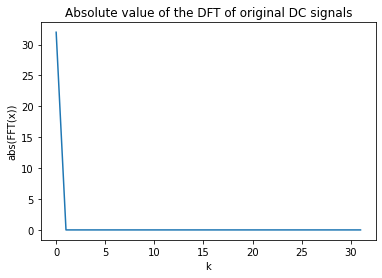

In [ ]:
plt.plot(abs(np.fft.fft(x)))
plt.title('Absolute value of the DFT of original DC signals')
plt.xlabel('k')
plt.ylabel('abs(FFT(x))')

**Note**: We have only one peak at spatial frequency index k=0, as expected.

Now we look at the **values of the DFT of the downsampled version** :

Text(0, 0.5, 'abs(FFT(xds))')

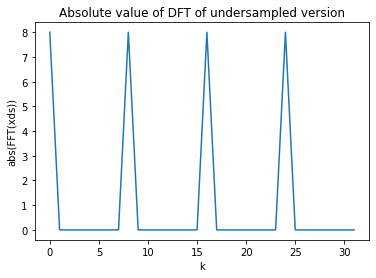

In [ ]:
XDS=np.fft.fft(xds) 
plt.plot(abs(XDS))
plt.title('Absolute value of DFT of undersampled version')
plt.xlabel('k')  
plt.ylabel('abs(FFT(xds))') 

**Note**: The peak at k=0 corresponds our original DC signal, the other peaks are the **periodic continuations** which are not part  of the original . We must supress these now.

**We see**: We can do this by setting the coefficients of the frequencies with the indices from 8 to 24 to zero (Low Pass filter).

Now we test a signal with a **higher frequency** and apply the downsampling at M=4 :

Text(0, 0.5, 'x(n), xds(n)')

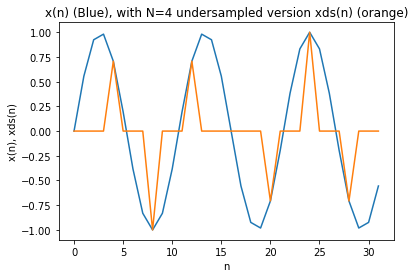

In [ ]:
x=np.sin(2*np.pi/32*3*np.arange(32))
xds=np.zeros(32)
xds[0:32:4]=x[0:32:4]
plt.plot(x)
plt.plot(xds)
plt.title('x(n) (Blue), with N=4 undersampled version xds(n) (orange)')
plt.xlabel('n')
plt.ylabel('x(n), xds(n)')

The **DFT of original signal** is:

Text(0, 0.5, 'abs(FFT(x))')

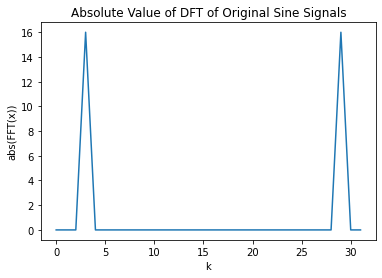

In [ ]:
plt.plot(abs(np.fft.fft(x)))
plt.title('Absolute Value of DFT of Original Sine Signals')
plt.xlabel('k')
plt.ylabel('abs(FFT(x))')

Now let‘s look at the **value of DFT of downsampled version**:

Text(0, 0.5, 'abs(FFT(xds))')

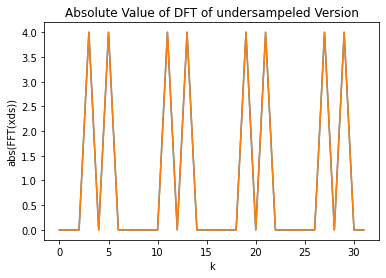

In [ ]:
XDS=np.fft.fft(xds) 
plt.plot(abs(XDS)) 
plt.plot(abs(XDS)) 
plt.title('Absolute Value of DFT of undersampeled Version')
plt.xlabel('k') 
plt.ylabel('abs(FFT(xds))') 

**Note**: The first peak at k=3 and the last peak at k=29 (because of the symmetry of the DFT) belong to the signal, the others are periodic continuations, which do not belong to the original signal. Here we must now set the coefficients/subbands of **indices from 5 to 27 to zero**. This is now actually a bigger area than for DC, or a low pass filter with lower cutoff frequency.

**Note**: The spectral continuations (the aliasing) **move toward each other**, compared to DC. We increase the frequency of our signal and the frequency of first spectral continuation moves downward. If we increase the frequency of our sinusoidal signal a little more,  to a frequency which corresponds to index k=4, then the **original** and the first **spectral continuation** or **alias component overlap**, so that they can no longer be **separated**, which destroys the signal.

**Example how sampling can destroy a signal (M=4):**

In [ ]:
x=np.sin(2*np.pi/32*4*np.arange(32))
xds=np.zeros(32)
xds[0:32:4]=x[0:32:4]
xds

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.22464680e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.44929360e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.67394040e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.89858720e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.12323400e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -7.34788079e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.57252759e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

**Observe**: The sampled version of our sine signal is completely zero! The sine function had a already **too high** frequency for our sampling. 

This means that with our **lowpass filter** we should set the **coefficients** of **indices 4 to 28 to zero**.

**In summary**: Our example shows: We can generally suppress the spectral continuations (aliasing) with a low pass filter which sets the coefficients/subbands of **indices from 4 to 28 to zero**.

This means, however, that we can **no longer transmit signals in the range of these spatial frequencies!** Our signals can only have spatial frequencies strictly smaller than index 4.


We can put this in **relation to the sampling frequency at the DFT**, which appears here at the (not calculated index) $k=N=32$. Our down-sampling rate was $M=4$, so our system can only transmit signals with **spatial frequencies strictly smaller than cut off frequency** $$f_{G}:=\frac{N}{2M}=4$$  

This is the **new Nyquist frequency**, which is the **old Nyquist frequency N/2 divided by the down-sampling rate M**.
If we combine our downsampling rate M with the sampling frequency N, the new, low sampling frequency $f_{A}:=\frac{N}{M}$ results. Thus our low pass filter needs to pass the frequencies with the following DFT indices,

$$k<f_{G}=\frac{f_{A}}{2}$$

Because of the symmetry of DFT, this is also mirrored for the upper end of  DFT coefficients according to:

$$k>N-\frac{f_{A}}{2}$$

I.e. we leave only the coefficients from below to (exclusively) $\frac{f_{A}}{2}$ , and from „up“  to down till (exclusive) $N-\frac{f_{A}}{2}$.
I.e. we must set all DFT coefficients in following range to zero :

$$\frac{f_{A}}{2}≤k≤ N-\frac{f_{A}}{2}$  $(1)$$

This means our **signal frequency** must be **strictly smaller** than the half of our new **sampling frequency!**

This is called the „**Sampling theorem**“ after Shannon Nyquist or simply after Nyquist.

Therefore we call the cut-off frequency $f_{G}$ ,the **half sampling frequency**, the „**Nyquist Frequency**“.

#**Normalized Frequency**
To make this formualtion independent of our sampling rate, a so called „**normalized frequency**“ is used, where:
 - $2π$ corresponds to the **sampling frequency** (to also indicate that this is the same as frequency 0)
 - $π$ corresponds to the **Nyquist frequency**
 - $𝛺$ is a **normalized frequency**

  Hence we obtain the normalized frequency by dividing by the sampling rate (here: N), and multiply by $2π$.

  If $2π$ corresponds to our higher sampling rate, then the passpand of our low pass filter before downsampling in eq. (1) is hence simply

  $$\frac{-π}{M}<𝛺<\frac{π}{M}$$

  where . Here the negative frequencies are the upper half of our DFT spectrum.

#**Python Example**
We take our video signal with c=640 columns and r=480 rows. The DFT (or in Python the FFT) generates correspondingly many coefficients of the spatial frequencies. We have a downsampling factor of M=4 (for every dimension). So the (new) sampling frequency is over the columns, along the rows:

$f_{Ac}=\frac{c}{M}$ and over the rows, along the columns $f_{Ar}=\frac{r}{M}$.

Then our lowpass **filter along the rows** must set the DFT coefficients to zero with the indices in range $\frac{f_{Ac}}{2}=\frac{c}{2M}=\frac{c}{8}$ to $N-\frac{f_{Ac}}{2}=c-\frac{c}{8}$ (remember: $N=c$ here). Hence we get the range, 

$$\frac{c}{8}≤k≤c-\frac{c}{8}$$

for our **stopband**. For the filter along the columns, the following is obtained: The coefficients in the range of, 

$$\frac{r}{8}≤k≤c-\frac{r}{8}$$

must be set to zero (for the stopband). This is what we see in the Python script 

    **videofft0ifftresampley.py

The 2-dimensional filter is defined with the following rows in DFT area as a mask:

In [2]:
#@title Videostream (please run this first)
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import html
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io

def jsob_to_image(js_object):
  # decode base64 image
  image_bytes = b64decode(js_object.split(',')[1])
  # convert bytes to numpy array
  img_array = np.frombuffer(image_bytes, dtype=np.uint8)
  # convert numpy array into OpenCV BGR 
  frame = cv2.imdecode(img_array, flags=1)

  return frame

#JavaScript code to get the stream
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="blue: red; font-weight: bold;">' +
          'click here to stop the video</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; 
      captureCanvas.height = 480; 
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame() {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }
      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
  
            
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame():
  data = eval_js('stream_frame()')
  return data




In [4]:
import cv2

# Get the webcam stream and forward it to python 
video_stream()

while True:
    frame_js = video_frame()
    if not frame_js:
        break
    img = jsob_to_image(frame_js["img"])

#Downsampling factor N:
N=4;
[rows,cols,c]=img.shape;
r=rows
c=cols

#columns matrix:
Mr=np.ones((r,1)) 
Mr[round((r/8.0)):round((r-r/8.0)),0]=np.zeros(round((3.0/4.0*r))) 
#For columns: 
#rows matrix
Mc=np.ones((1,c)) 
Mc[0,round((c/8.0)):round((c-c/8))]=np.zeros(round((3.0/4.0*c))); 
#Together: 
#column by row results Matrix:
M=np.dot(Mr,Mc)
print(M)


<IPython.core.display.Javascript object>

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


Execute with :
python videofft0ifftresampley.py

version with key control:
python videofft0ifftresampleykey.py

#**Resulting Structure of our System:**

##**Sender:**

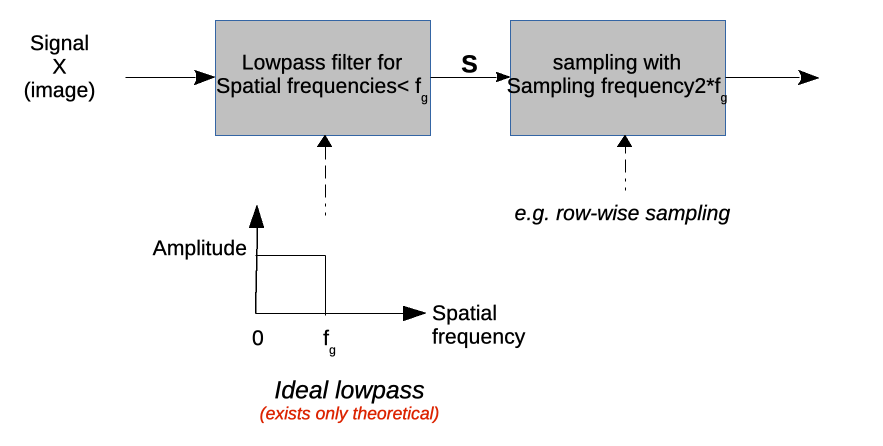

Transmit the down-sampled signal to **reduce the data rate**.

##**Receiver:**

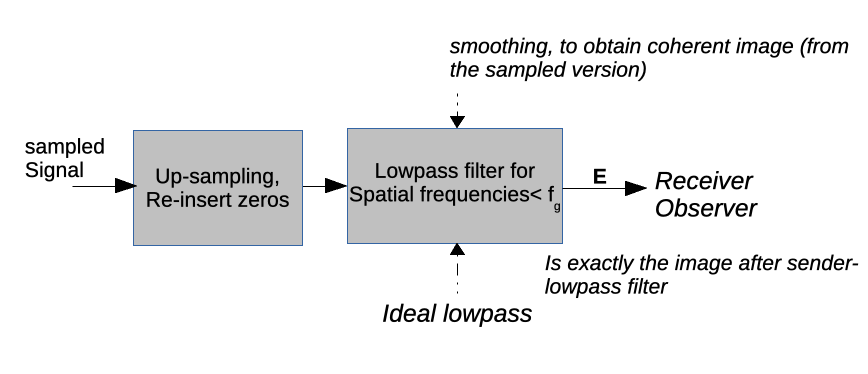

**Guarantee from Nyquist: E = S**

What if the sampled signal is **not digital**, where the filters are easy to build, **but analog**?

**Example:**

- Video camera with its pixels or, by analog cameras, lines or rows.
- Monitor with its pixels, or by analog monitors lines.


**Sender, camera:**

- It often has no low-pass filter
      → if image contains higher spatial frequencies, so- 
           called „Aliasing“ or Moire appears (Artefacts by sampling)
      

**Problem**:	Moire/Aliasing is already in the camera due to too fine optical pattern/too high spatial frequencies in image.

**Possible solution:**

- Blur the camera slightly
- Better: optical pre-filtering, low pass filtering
- Stage designing, choose costumes so that there would be no fine pattern in the image.

**Also:**

- Aliasing cannot be removed afterwards, but it can be avoided, if we take care that the image does not contain high spatial frequencies before the sampling .


#**Receiver: Kell Factor**

→ Lowpass filtering of sampled signal in receiver

Example TV: After displaying the lines (pixels) in screen, the lowpass filtering is left to the eye.

**lowpass filter function of eye**

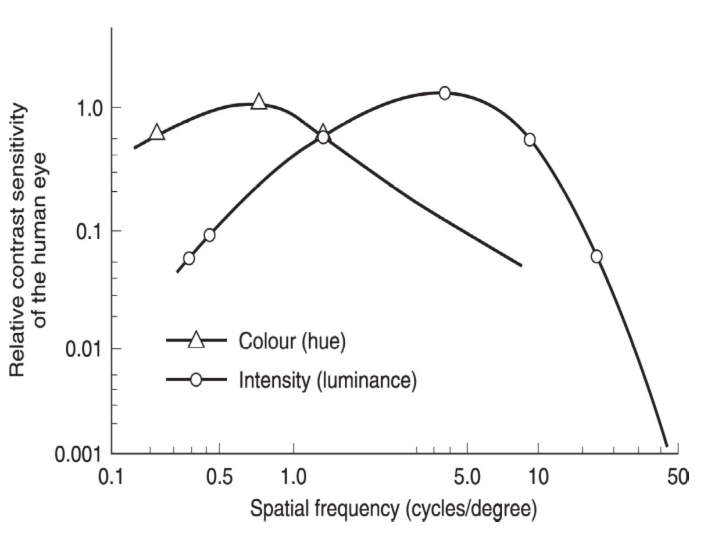

[J. Watkinson: The MPEG Handbool, Focal Press]

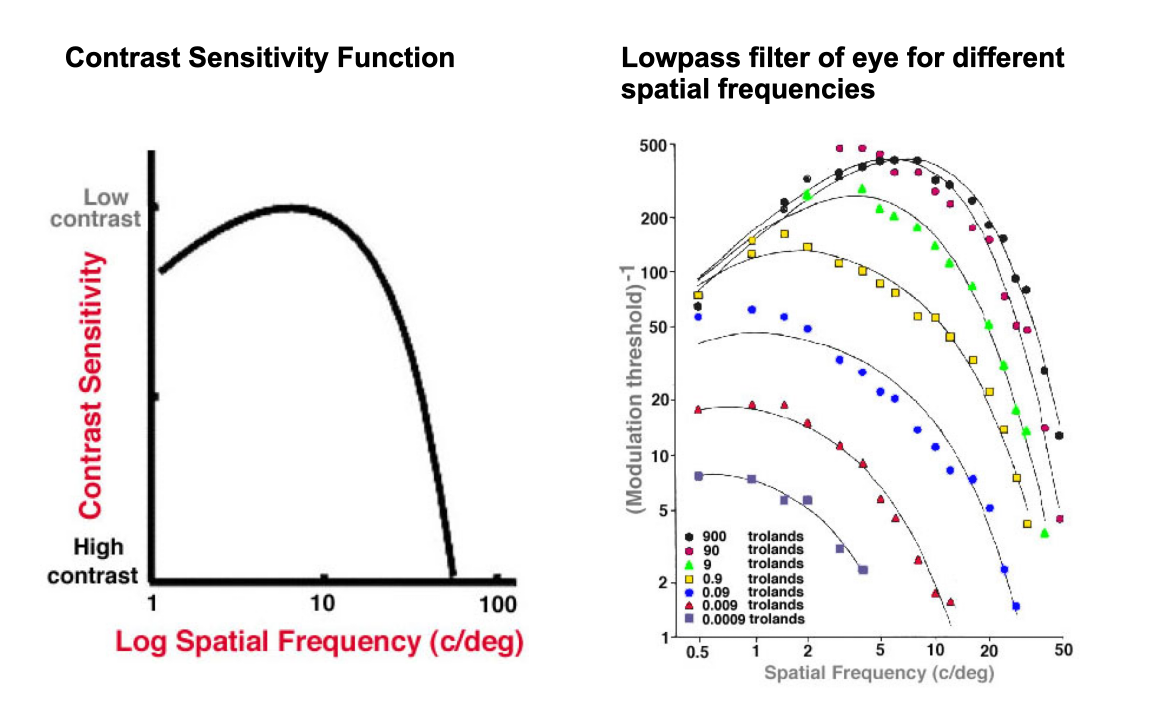

[http://webvision.med.utah.edu/KallSpatial.html]

So:
- The eye does not have a perfect or ideal low-pass filter!
- **Slow drop in sensitivity** to high frequencies
- We must dimension our monitors in such a way that the eye is already sufficiently insensitive  at half the sampling frequency (pixel frequency); that **eye should not be able to perceive the line grid** or **pixel grid**.
- Just below this frequency, the eye is still **relatively insensitive**, cannot realy be used for information transmission at these spatial frequencies. 
- The **range usable for transmission ends much earlier** than the range of high attenuation begins.
- We have a „**transition band**“, a kind of safety distance  between pass band and and stop band.

We take the eye as reconstruction low-pass filter. 
Assumption: Screen, display is sharp, lets you see the individual lines or pixels at a close viewing distance. 

→ Thus wee need the “**Transfer function” of eye** for different spatial frequencies, for estimation of „cut-off frequency“ of our low-pass of the eye. 


**Illustration of a lowpass in the spatial domain:**

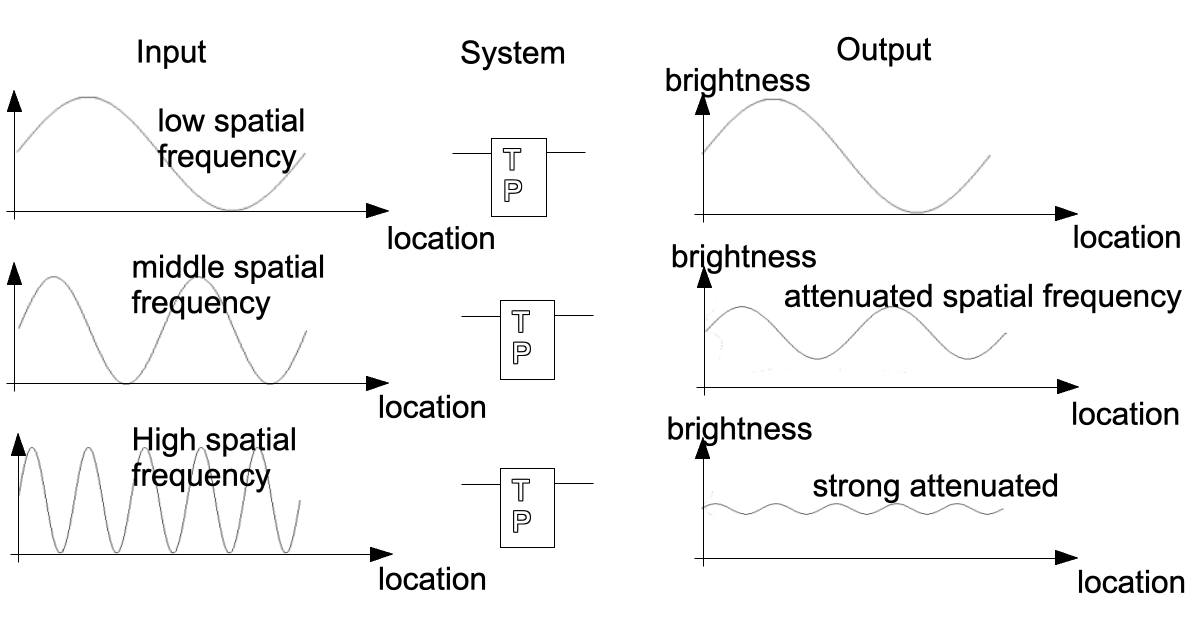

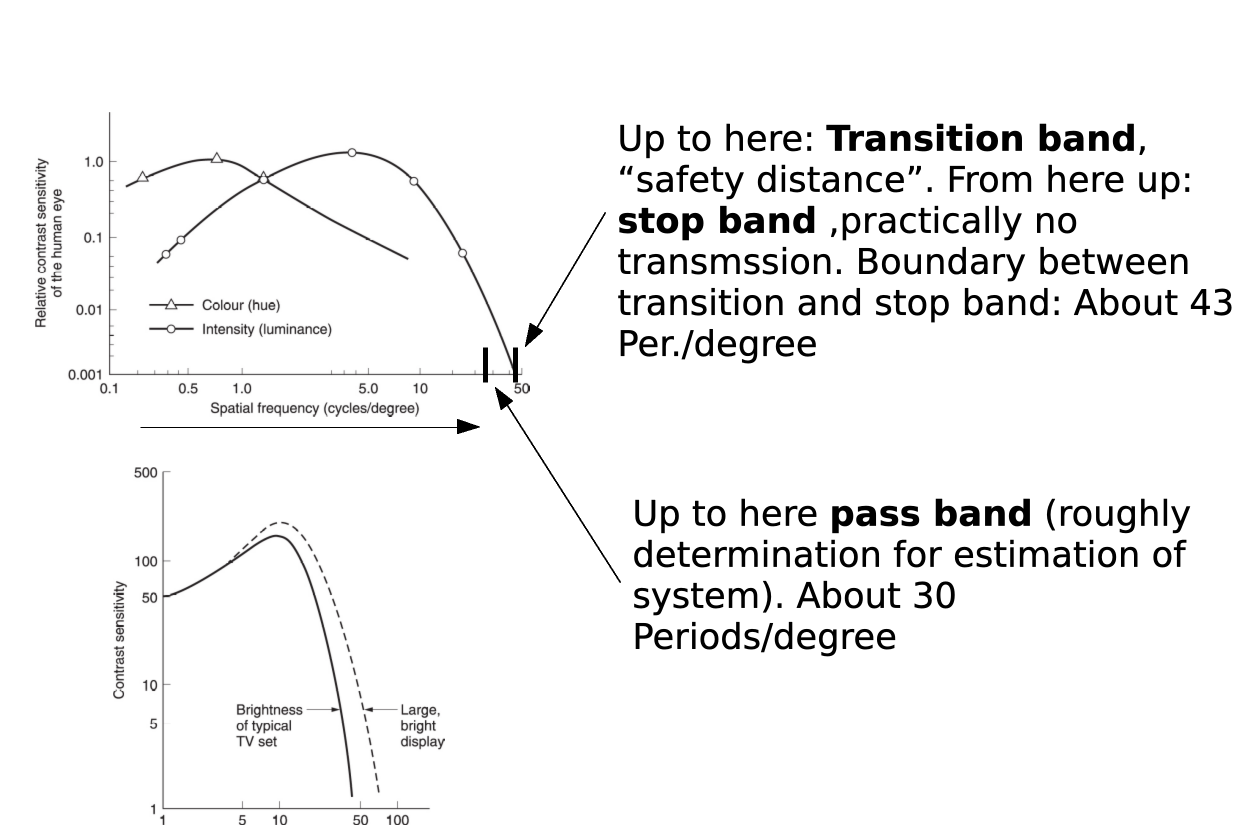

- “Safety distance”, transition band appears between about 30 and 43 cycles/degree
- That means our signal to be **transmitted** goes up to 30 cycles/degree, but our **sampling** must be designed for 43 cycles/degre so that the eye can not perceive the line or pixel grid. 
-The **safety distance results in a factor** which specifies a higher sampling frequency than is actually required by the Nyquist theorem.
-For analog TV, for row sampling: We need more samples (pixels) in  an image than twice the maximum spatial frequency in an image (e.g. periodic black-white Lines)
In our case, the factor is:

 $$\frac{43}{30}=1.43̅$$

  The reciprocal of this is so called “**Kell-Factor**”:

  $$\frac{1}{1.43̅ }=0.7$$



It indicates that the number of lines in a captured image should  be smaller by a factor of a given line number in the recording device in order to avoid artefacts. (e.g., areas where lines can be seen, alternated with evenly gray areas). 

Thus, the reciprocal of the Kell factor is roughly a factor to get from the upper limit of the "pass-band" to the lower limit of the "stop-band" in the transfer function.


In this case, one has to estimate “pass band” and “stop band”.

→ Experiments are necessary. These experiments were actually carried out in the early years of television, among others from Kell.


#**Example Analog Television:**
Image format(aspect ratio) 3:4, viewing distance 5 x diagonal. e.g. 50 cm display size(diagonaly)  → 2.5m distance. Computer screen: distance about 50 cm → Diagonal of 10 cm!

Vertical, example: length $1$, 
horizontal length $1,33 (4/3)$

Diagonal: $1.6̅$

Distance: $5*1.6̅ = 8.3̅$

Therefore distance: $8.3̅$ ; height=1; which  angle?:


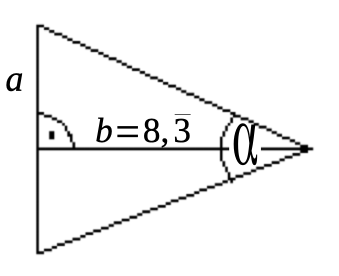

$$tan(\frac{α}{2})=\frac{a}{b}=\frac{0.5}{8.3̅}=0.06$$

$$\frac{α}{2}=arctan(0.06)=3.43 Grad$$

→	Need the angle to determine how many periods the eye can perceive. Want to use the upper limit of pass band to use the low pass filter property.

 →  $α=2*3.43=6.87°$ for vertical of creen. Upper limit of pass band of eye: about 30 cycles/degree.

→   I.e. On 6,87 degree results in

$$30\frac{cycles}{degree}*6.87°=206cycles$$

In order to avoid the artefacts at this highest spatial frequency, we need the safety distance, so we must divide by the Kell-Factor of 0.7.

It results $\frac{206cycles}{0.7}=294cycles$ , which the screen must be able to display. 

How many lines do we need for 294 periods? This is basically our Nyquist frequency. Twice this is our sampling frequency, the number of rows.

A period is bright and dark at least once:
→  $2*294=588rows$

For comparison: 

Europe: 625 lines 

USA: 525 lines

→	good correspondence

→	We came from the "transmission function" of the eye for spacial frequencies to the line number of the television!

→	Transfer function (CSF) is a “powerful” tool.

#**5.1 Quality measurement**
##**MSE – mean squared error**

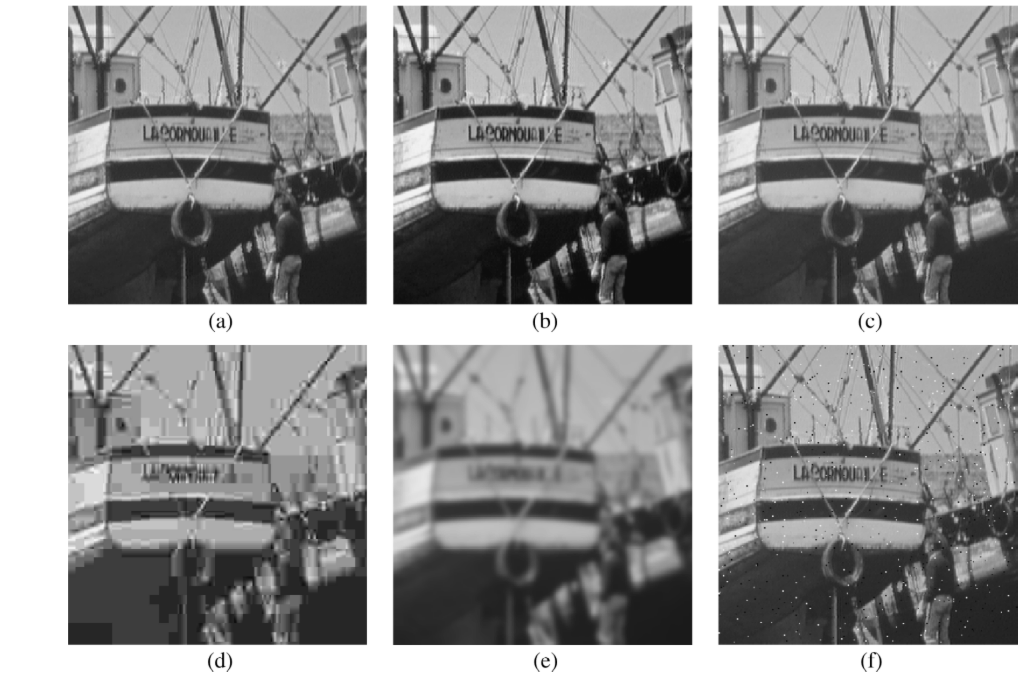

**Fig. above:** Comparison of “Boat” images with different types of distortions, all with MSE = 210. (a) Original image (8 bits/pixel; cropped from 512 x 512 to 256 x 256 for visibility). (b) Contrast-stretched image, MSSIM = 0,9168. (c) Mean-shifted image, MSSIM = 0,9900. (d) JPEG compressed image, MSSIM = 0,6949. (e) Blurred image, MSSIM = 0,7052. (f) Salt-pepper impulsive noise contaminated image, MSSIM = 0,7748.

(source: Wan, Bovik, Sheikh: “Image Quality Assessment: From Error Visibility to Structural Similarity”, IEEE Trans. on Image Processing, April 2004.)

(Access to the IEEE publication through the website:

*ieeexplore.ieee.org*

Within the TU-Ilmenau network also with fulltext access. Essentially also for literature searches ) 

**IEEE: Institute of Electrical and Electronics Engineers**,
The most prestigious international professional organization in our field.
There is also a TU-Ilmenau IEEE Student Branch,which is a local branch of it for students.

**Other Literature:**

N. Damera-Venkata, T.D. Kite, W. S. Geilser, B. L. Evans and A. C. Bovik: „Image Quality Assesment Based on a Degradation Model“, IEEE Trans. Of Image Processing, vol. 9, np. 4, pp. 636-650, April 2000

Z. Wang, A. C. Bovik and L. Lu: „Why is Image Quality Assessment So Difficult?“, IEEE Int. Cong. On Acoustics, Speech & Signal Processing, May 2002


##**Definition of MSE:**
MSE is the Mean Squared Error.If we take an original signal and a decoded signal with error  and we have a signal length of N (e.g. the number of pixels), then the MSE  is defined as:

$$MSE=\frac{1}{N}⋅\sum_{n=0}^{N-1}(x(n)-x_{rek}(n))^2$$

Therefore: The larger the MSE value, the worse the image. The coherence or the importance of a pixel is not cosidered here!

##**Problem with simple MSE:**
- not necessarily very meaningful

→ 	different images with equal MSE can have subjectively very 	different qualities


##**Relative measure to MSE:**
→ **Peak-Signal-to-Noise Ratio (PSNR), in dB**
$$4PSNR=10⋅log_{10}(\frac{Max^{2}_{I}}{MSE})$$

	MaxI: the largest possible value in image
		  (ex.: 8 Bit per brightness value 				     → MaxI =255)
Here: The **larger** the PSNR value, the better the image. Roughly one says: With PSNR of 30 dB or more we have a „very good“ image. However, the PSNR has the same drawbacks as the MSE, it is only limited in meaning, and can be used  essentially to compare e.g. similar **coders**.

- **Advantage**: relative **independence** from the  **internal representation** of the image, i.e., the bits per brightness value.
         Unlike MSE, which becomes larger with more bits 
         and the same relative error.

##**Objective measures that better reflect the subjective impression:**
- Knowledge about the visual process of eye must be „buit in“
      
- Example: Emphasizing the edges in an image, because they are important for the eye
      → Special treatment of the forms or structures in the image
      
- Procedure: **SSIM** (Structural Similarity) [Wand, Bovik → s. [1]]
        ◦ Extract structure
        ◦ Measuring changes in the processed image
          
- Related measure: **Q** (Quality) [Wang, Bovik]

##**Possible structure of an improved objective measure**

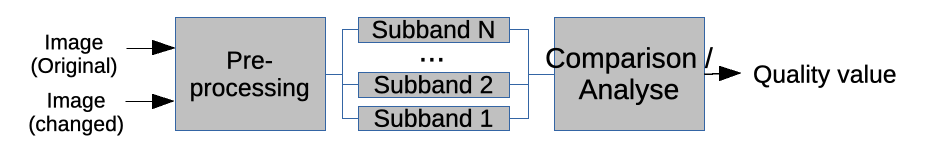

**Subband 1...N:**

- Filtering different spatial frequencies , corresponds to the spectral coefficients of DFT.
- Used for different eye sensitivities for different spatial frequencies, using the CSF
- Further: Gets the edges and structure of image

**Camparison/Analysis:**

- E.g.very low and very high spatial frequencies (background brightness or very fine Details) are evaluated less strongly (refers to changes in processed image)
- Result(hopefully):
    
    ◦ an objective quality measure, which is closer to a subjective impression 

-Will become more important in the future, because modern compression methods use more and more properties of the eye.
  

→ Need objective measures that take these characteristics into account.